Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando base de dados

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars (2).csv


In [3]:
cars = pd.read_csv('cars.csv', sep=",")

Verificando informações iniciais

Pergunta 1 - Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:

In [4]:
print(cars.shape)
cars.info()
cars.head()


#R: Não foram encontrados valores nulos após a leitura dos dados.

(261, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


Pergunta 2 - Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação é CORRETO afirmar:

In [5]:
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors='coerce')
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors='coerce')

In [6]:
cars.info()
cars.head()

#R: Essa transformação adiciona valores nulos ao nosso dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


Pergunta 3 - Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [7]:
cars.loc[cars['cubicinches'].isnull()]

#R: 40 e 180

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


Pergunta 4 - Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [8]:
cars.isnull().sum()

#R: 5

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

Pergunta 5 - Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [9]:
cars['cubicinches'].fillna(cars['cubicinches'].mean(), inplace=True)
cars['weightlbs'].fillna(cars['weightlbs'].mean(), inplace=True)

cars.describe()

#R: 3009.8333333

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


Pergunta 6 - Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [10]:
cars1 = cars[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]
cars1['mpg'].median()

#R: 22

22.0

Pergunta 7 - Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [11]:
cars1['time-to-60'].describe()

#R: 75% dos dados são maiores que o valor de 14,00.

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

Pergunta 8 - Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

In [12]:
cars1[['mpg', 'cylinders']].corr()

#R: Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” também aumenta em uma mesma direção.

,mpg,cylinders
mpg,1.00000,-0.77671
cylinders,-0.77671,1.00000


Pergunta 9 - Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

count    261.000000
mean     106.360153
std       40.499959
min       46.000000
25%       75.000000
50%       95.000000
75%      138.000000
max      230.000000
Name: hp, dtype: float64

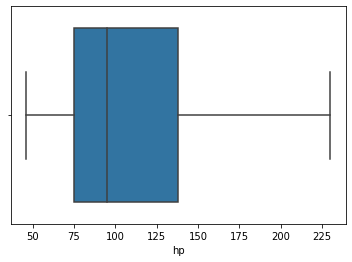

In [13]:
sns.boxplot(cars1['hp']);
cars1['hp'].describe()

#R: Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.

Pergunta 10 - Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [14]:
padroniza = StandardScaler()

colunas = cars1.columns
cars2 = padroniza.fit_transform(cars1)
cars2 = pd.DataFrame(cars2, columns=colunas)

print(cars2['hp'].max())

#R: 1,45 - Revisar com IGTI

3.05870398977614


Pergunta 11 - Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?

In [15]:
pca = PCA(n_components=7)

pca_11 = pca.fit_transform(cars2)
pca.explained_variance_ratio_[0]

#R:72%

0.7237134885896341

Pergunta 12 - Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:

In [16]:
kmeans = KMeans(n_clusters=3,random_state=42)

q12 = kmeans.fit_predict(cars2)
kmeans.cluster_centers_

pd.Series(q12).value_counts()

#R: Todos os clusters possuem a mesma quantidade de elementos.

1    95
0    91
2    75
dtype: int64

Pergunta 13 - Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas  ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [17]:
eficiencia = np.where(cars1['mpg'] > 25, 1, 0)

pd.Series(eficiencia).value_counts()

0    162
1     99
dtype: int64

In [18]:
cars3 = cars2[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]

In [19]:
ad = DecisionTreeClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(cars3, eficiencia, test_size=0.3, random_state=42)

ad.fit(X_train, y_train)

previsaoAd = ad.predict(X_test)

Acurácia: 87.34177215189874


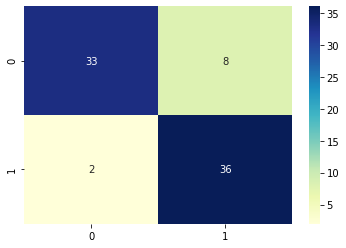

In [20]:
confusaoAd = confusion_matrix(y_test, previsaoAd)
sns.heatmap(confusaoAd, cmap="YlGnBu", annot=True)

print("Acurácia: {}".format(((33+36)/79)*100))

#R: Aproximadamente, 0,87.

Pergunta 14 - Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

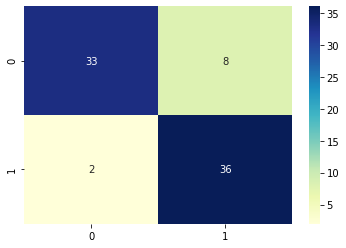

In [21]:
confusaoAd = confusion_matrix(y_test, previsaoAd)
sns.heatmap(confusaoAd, cmap="YlGnBu", annot=True)

#R: Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.

Pergunta 15 - Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar:

In [22]:
lR = LogisticRegression(random_state=42)

lR.fit(X_train, y_train)

previsaoLr = lR.predict(X_test)

In [23]:
print('Regressão Logística:')
print(classification_report(y_test, previsaoLr))
print('Árvore de Decisão:')
print(classification_report(y_test, previsaoAd))

#R:A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.

Regressão Logística:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79

Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79

